In [1]:
import numpy as np
import pandas as pd
import sys
import seaborn
import matplotlib
import matplotlib.ticker
from matplotlib import pyplot as plt

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
seaborn.set()
seaborn.set_style("white")
seaborn.set_context("poster")
from matplotlib import pyplot

In [2]:
def print_accuracy(title, data, stds, marker_styles, curve_colors,
                   curve_styles, curve_labels, leg_title, rand_base, leg_loc, leg_flag, name):
    fig, ax = plt.subplots(figsize=(4, 3))
    plt.title(title , fontsize=25)
    plt.xlabel(r'Model Size Factor', fontsize=25)
    plt.ylabel(r'Accuracy (%)', fontsize=25)
    plt.xlim((0.245, 4.07))
    plt.ylim((-1, 101))
    #plt.grid(True, which='both')
    ax.xaxis.tick_bottom() ### CHANGED
    ax.yaxis.tick_left() ### CHANGE
    plt.xscale('log',basex=2)
    plt.xticks(size_factors, size_labels)
    plt.yticks([0, 20, 40, 60, 80, 100])
    
    for curve_idx in range(np.shape(data)[0]):
        non_0_idx = (data[curve_idx] != 0)
        plt.errorbar(size_factors[non_0_idx], data[curve_idx][non_0_idx], yerr=stds[curve_idx][non_0_idx], marker=marker_styles[curve_idx], color=curve_colors[curve_idx],
                 linestyle=curve_styles[curve_idx], linewidth=3, markersize=7)
    plt.errorbar(size_factors, [rand_base for i in range(len(size_factors))], color='dimgrey', linestyle=':', linewidth=3, alpha=0.75)

    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
        
    if leg_flag:
            leg = plt.legend(curve_labels, loc=leg_loc, framealpha=0.8, fontsize=12, title=leg_title)
            leg.get_title().set_fontsize('12')
    plt.rc('xtick',labelsize=8)

    plt.show()
    #seaborn.despine()
    fig.savefig(name+".pdf",format='pdf', bbox_inches='tight',dpi=1000)

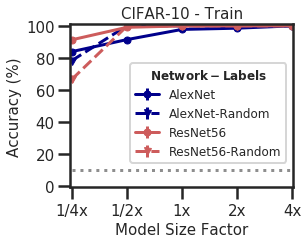

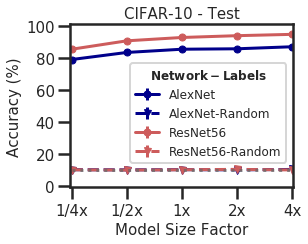

In [3]:
#Base CIFAR

sys.path.append('../')
import experiments


curves = 4
curve_labels = ['AlexNet', 'AlexNet-Random', 'ResNet56', 'ResNet56-Random']
curve_colors = ['darkblue', 'darkblue', 'indianred', 'indianred']
curve_styles = ['-', '--', '-', '--']
marker_styles = ['o', 'v', 'o', 'v']
sizes = 5
size_factors = np.array([0.25, 0.5, 1, 2, 4])
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']
seeds = 2

results = np.zeros((seeds, curves, sizes))
results_test = np.zeros((seeds, curves, sizes))
# both are indexed [nn_type][size_factor]

for seed in range(seeds):
    for ID in range(62, 92):

        #print('Processing ID:', ID)
        opt = experiments.opt[ID]

        if opt.dataset.random_labels:
            curve_idx = 1  # random labels
        elif opt.hyper.augmentation and opt.hyper.drop_train < 1:
            curve_idx = 0  # all regularizers
        else:
            continue

        size_idx = size_idx_map[opt.dnn.neuron_multiplier[0]]

        csv_file = experiments.opt[ID].csv_dir + experiments.opt[ID].name + '_redundancy.csv'
        csv_file = csv_file.replace("seed=0", "seed=" + str(seed))
        df = pd.read_csv(csv_file)
        acc = df[df['evaluation_set'] == 'train']['performance'].iloc[0]
        acc_test = df[df['evaluation_set'] == 'test']['performance'].iloc[0]
        results[seed][curve_idx][size_idx] = acc
        results_test[seed][curve_idx][size_idx] = acc_test

    
    for ID in range(217, 231):

        #print('Processing ID:', ID)
        opt = experiments.opt[ID]

        if opt.dataset.random_labels:
            curve_idx = 3  # random labels
        elif opt.hyper.lr_bs_factor == 1:
            curve_idx = 2  # all regularizers
        else:
            continue

        size_idx = size_idx_map[opt.dnn.neuron_multiplier[0]]

        csv_file = experiments.opt[ID].csv_dir + experiments.opt[ID].name + '_redundancy.csv'
        csv_file = csv_file.replace("seed=0", "seed=" + str(seed))
        df = pd.read_csv(csv_file)
        acc = df[df['evaluation_set'] == 'train']['performance'].iloc[0]
        acc_test = df[df['evaluation_set'] == 'test']['performance'].iloc[0]
        results[seed][curve_idx][size_idx] = acc
        results_test[seed][curve_idx][size_idx] = acc_test

results *= 100
results_test *= 100
results_mean = np.mean(results,axis=0)
results_test_mean = np.mean(results_test,axis=0)
results_std = np.std(results,axis=0)
results_test_std = np.std(results_test,axis=0)
    
leg_loc = (0.27, 0.15)
print_accuracy(r'CIFAR-10 - Train', results_mean, results_std, marker_styles, 
               curve_colors, curve_styles, curve_labels, r"$\bf{Network-Labels}$", 10, leg_loc, True,
              "acc_cifar_train")
print_accuracy(r'CIFAR-10 - Test', results_test_mean, results_test_std,  marker_styles,
               curve_colors, curve_styles, curve_labels, r"$\bf{Network-Labels}$", 10, leg_loc, True, 
              "acc_cifar_test")



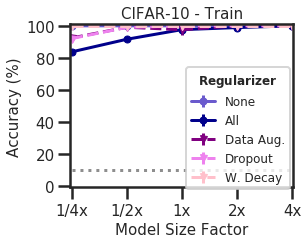

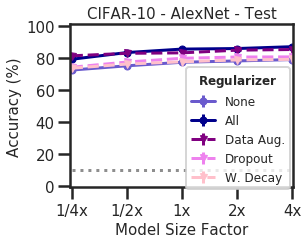

In [4]:
#Regularizers CIFAR

sys.path.append('../')
import experiments


curves = 5
curve_labels = ['None', 'All', 'Data Aug.', 'Dropout', 'W. Decay']
curve_colors = ['slateblue', 'darkblue', 'purple', 'violet', 'pink']
curve_styles = ['-', '-', '--', '--', '--']
marker_styles = ['o', 'o', 'v', 'v', 'v']
sizes = 5
size_factors = np.array([0.25, 0.5, 1, 2, 4])
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']
seeds = 3

results = np.zeros((seeds, curves, sizes))
results_test = np.zeros((seeds, curves, sizes))
# both are indexed [nn_type][size_factor]

for seed in range(seeds):
    for ID in range(62, 92):

        #print('Processing ID:', ID)
        opt = experiments.opt[ID]

        curve_idx = 0  # unregularized
        if opt.dataset.random_labels:
            continue
        elif opt.hyper.augmentation and opt.hyper.drop_train < 1:
            curve_idx = 1  # all regularizers
        elif opt.hyper.augmentation:
            curve_idx = 2
        elif opt.hyper.drop_train < 1:
            curve_idx = 3
        elif opt.hyper.weight_decay:
            curve_idx = 4

        size_idx = size_idx_map[opt.dnn.neuron_multiplier[0]]

        csv_file = experiments.opt[ID].csv_dir + experiments.opt[ID].name + '_redundancy.csv'
        csv_file = csv_file.replace("seed=0", "seed=" + str(seed))
        df = pd.read_csv(csv_file)
        acc = df[df['evaluation_set'] == 'train']['performance'].iloc[0]
        acc_test = df[df['evaluation_set'] == 'test']['performance'].iloc[0]
        results[seed][curve_idx][size_idx] = acc
        results_test[seed][curve_idx][size_idx] = acc_test

results *= 100
results_test *= 100
results_mean = np.mean(results,axis=0)
results_test_mean = np.mean(results_test,axis=0)
results_std = np.std(results,axis=0)
results_test_std = np.std(results_test,axis=0)

leg_loc = (0.52, -0.01)
print_accuracy(r'CIFAR-10 - Train', results_mean, results_std,  marker_styles, 
               curve_colors, curve_styles, curve_labels, r"$\bf{Regularizer}$", 10, leg_loc, True,
              "acc_cifar_regularizers_train")
print_accuracy(r'CIFAR-10 - AlexNet - Test', results_test_mean, results_test_std, marker_styles,
               curve_colors, curve_styles, curve_labels, r"$\bf{Regularizer}$", 10, leg_loc, True, 
              "acc_cifar_regularizers_test")



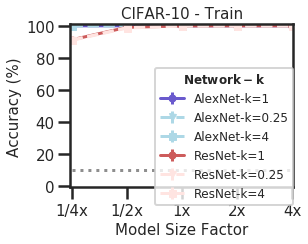

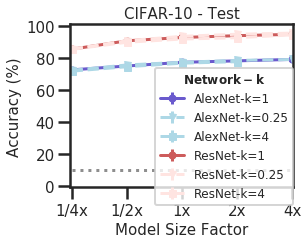

In [5]:
#Batch/LR (ResNet + AlexNet base) CIFAR

sys.path.append('../')
import experiments


curves = 6
curve_labels = ['AlexNet-k=1', 'AlexNet-k=0.25', 'AlexNet-k=4', 'ResNet-k=1', 'ResNet-k=0.25', 'ResNet-k=4']
curve_colors = ['slateblue', 'lightblue', 'lightblue', 'indianred', 'mistyrose', 'mistyrose']
curve_styles = ['-', '--', '--', '-', '--', '--']
marker_styles = ['o', 'v', 's', 'o', 'v', 's']
sizes = 5
size_factors = np.array([0.25, 0.5, 1, 2, 4])
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']
seeds = 2

lr_factor = [1, 0.25, 4]

results = np.zeros((seeds, curves, sizes))
results_test = np.zeros((seeds, curves, sizes))
# both are indexed [nn_type][size_factor]

for seed in range(seeds):
    for ID in list(range(62, 92)) + list(range(157,217)) :

        #print('Processing ID:', ID)
        opt = experiments.opt[ID]

        if opt.dataset.random_labels:
            continue
        if not (opt.hyper.augmentation or opt.hyper.drop_train < 1 or opt.hyper.weight_decay):
            curve_idx = np.where(np.array(opt.hyper.lr_bs_factor) == lr_factor)[0][0]
        else:
            continue
            
        if ID == 166: #Not possible to calculate
            continue
            
        size_idx = size_idx_map[opt.dnn.neuron_multiplier[0]]

        csv_file = experiments.opt[ID].csv_dir + experiments.opt[ID].name + '_redundancy.csv'
        csv_file = csv_file.replace("seed=0", "seed=" + str(seed))
        df = pd.read_csv(csv_file)
        acc = df[df['evaluation_set'] == 'train']['performance'].iloc[0]
        acc_test = df[df['evaluation_set'] == 'test']['performance'].iloc[0]
        results[seed][curve_idx][size_idx] = acc
        results_test[seed][curve_idx][size_idx] = acc_test
        

    for ID in list(range(217,232)) + list(range(234,239)):

        #print('Processing ID:', ID)
        opt = experiments.opt[ID]

        if opt.dataset.random_labels:
            continue
        else:
            curve_idx = np.where(np.array(opt.hyper.lr_bs_factor) == lr_factor)[0][0] + 3

    
        size_idx = size_idx_map[opt.dnn.neuron_multiplier[0]]

        csv_file = experiments.opt[ID].csv_dir + experiments.opt[ID].name + '_redundancy.csv'
        csv_file = csv_file.replace("seed=0", "seed=" + str(seed))
        df = pd.read_csv(csv_file)
        acc = df[df['evaluation_set'] == 'train']['performance'].iloc[0]
        acc_test = df[df['evaluation_set'] == 'test']['performance'].iloc[0]
        results[seed][curve_idx][size_idx] = acc
        results_test[seed][curve_idx][size_idx] = acc_test

results *= 100
results_test *= 100
results_mean = np.mean(results,axis=0)
results_test_mean = np.mean(results_test,axis=0)
results_std = np.std(results,axis=0)
results_test_std = np.std(results_test,axis=0)

leg_loc = (0.38, -0.11)
print_accuracy(r'CIFAR-10 - Train', results_mean, results_std,  marker_styles, 
               curve_colors, curve_styles, curve_labels, r"$\bf{Network - k}$", 10, leg_loc, True,
              "acc_cifar_batch_train")
print_accuracy(r'CIFAR-10 - Test', results_test_mean, results_test_std, marker_styles,
               curve_colors, curve_styles, curve_labels, r"$\bf{Network - k}$", 10, leg_loc, True,
              "acc_cifar_batch_test")



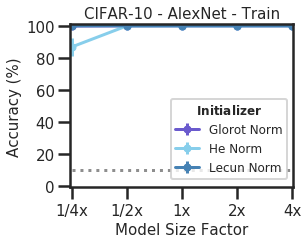

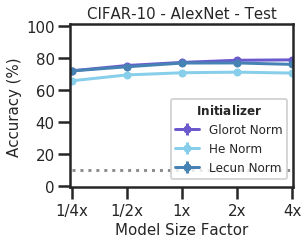

In [6]:
#Initializers CIFAR

sys.path.append('../')
import experiments


curves = 3
curve_labels = ['Glorot Norm', 'He Norm', 'Lecun Norm']
curve_colors = ['slateblue', 'skyblue', 'steelblue']
curve_styles = ['-', '-', '-']
marker_styles = ['o', 'o', 'o']
sizes = 5
size_factors = np.array([0.25, 0.5, 1, 2, 4])
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']
seeds = 3

results = np.zeros((seeds, curves, sizes))
results_test = np.zeros((seeds, curves, sizes))
# both are indexed [nn_type][size_factor]

for seed in range(seeds):
    for ID in range(2,32):

        #print('Processing ID:', ID)
        opt = experiments.opt[ID]

        curve_idx = opt.init_type // 2
        if opt.init_type in [1, 3, 5]:
            continue
            
        size_idx = size_idx_map[opt.dnn.neuron_multiplier[0]]

        csv_file = experiments.opt[ID].csv_dir + experiments.opt[ID].name + '_redundancy.csv'
        csv_file = csv_file.replace("seed=0", "seed=" + str(seed))
        df = pd.read_csv(csv_file)
        acc = df[df['evaluation_set'] == 'train']['performance'].iloc[0]
        acc_test = df[df['evaluation_set'] == 'test']['performance'].iloc[0]
        results[seed][curve_idx][size_idx] = acc
        results_test[seed][curve_idx][size_idx] = acc_test

results *= 100
results_test *= 100
results_mean = np.mean(results,axis=0)
results_test_mean = np.mean(results_test,axis=0)
results_std = np.std(results,axis=0)
results_test_std = np.std(results_test,axis=0)

leg_loc = (0.45, 0.05)
print_accuracy(r'CIFAR-10 - AlexNet - Train', results_mean, results_std,  marker_styles, 
               curve_colors, curve_styles, curve_labels, r"$\bf{Initializer}$", 10, leg_loc, True,
              "acc_cifar_initializers_train")
print_accuracy(r'CIFAR-10 - AlexNet - Test', results_test_mean, results_test_std, marker_styles,
               curve_colors, curve_styles, curve_labels, r"$\bf{Initializer}$", 10, leg_loc, True,
              "acc_cifar_initializers_test")


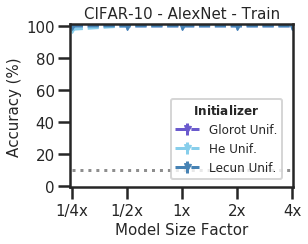

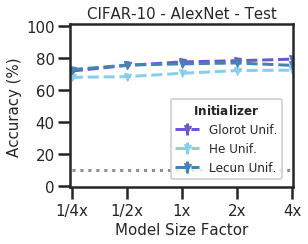

In [7]:
#Initializers CIFAR

sys.path.append('../')
import experiments


curves = 3
curve_labels = ['Glorot Unif.', 'He Unif.', 'Lecun Unif.']
curve_colors = ['slateblue', 'skyblue',  'steelblue']
curve_styles = ['--', '--', '--']
marker_styles = ['v', 'v', 'v']
sizes = 5
size_factors = np.array([0.25, 0.5, 1, 2, 4])
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']
seeds = 1

results = np.zeros((seeds, curves, sizes))
results_test = np.zeros((seeds, curves, sizes))
# both are indexed [nn_type][size_factor]

for seed in range(seeds):
    for ID in range(2,32):

        #print('Processing ID:', ID)
        opt = experiments.opt[ID]
        
        curve_idx = opt.init_type // 2
        if opt.init_type in [0, 2, 4]:
            continue
            
        size_idx = size_idx_map[opt.dnn.neuron_multiplier[0]]

        csv_file = experiments.opt[ID].csv_dir + experiments.opt[ID].name + '_redundancy.csv'
        csv_file = csv_file.replace("seed=0", "seed=" + str(seed))
        df = pd.read_csv(csv_file)
        acc = df[df['evaluation_set'] == 'train']['performance'].iloc[0]
        acc_test = df[df['evaluation_set'] == 'test']['performance'].iloc[0]
        results[seed][curve_idx][size_idx] = acc
        results_test[seed][curve_idx][size_idx] = acc_test

results *= 100
results_test *= 100
results_mean = np.mean(results,axis=0)
results_test_mean = np.mean(results_test,axis=0)
results_std = np.std(results,axis=0)
results_test_std = np.std(results_test,axis=0)

leg_loc = (0.45, 0.05)
print_accuracy(r'CIFAR-10 - AlexNet - Train', results_mean, results_std,  marker_styles, 
               curve_colors, curve_styles, curve_labels, r"$\bf{Initializer}$", 10, leg_loc, True,
              "acc_cifar_initializers2_train")
print_accuracy(r'CIFAR-10 - AlexNet - Test', results_test_mean, results_test_std, marker_styles,
               curve_colors, curve_styles, curve_labels, r"$\bf{Initializer}$", 10, leg_loc, True,
              "acc_cifar_initializers2_test")


In [8]:
import pickle

with open('ids_mlps.p', 'rb') as handle:
    IDs = pickle.load(handle)
    
dataset_idx_map = {"rand10": 0, "rand10000": 1}
data_idx_map = {1e3: 0, 1e4: 1, 1e5: 2}
optimizer_idx_map = {0: 0, 1: 1, 2: 2, 5: 3}
init_idx_map = {1e-2: 0, 1e-1:1, 1:2, 1e1:3, 1e2:4, 1e3:5, 1e4:6, 1e5:7, 1e6:8, 1e7:9}


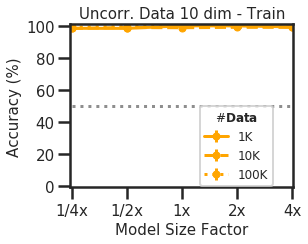

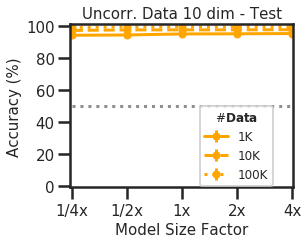

In [9]:
#Initializers - MLPs

sys.path.append('../')
import experiments


curves = 3
curve_labels = ['1K', '10K', '100K']
curve_colors = ['orange', 'orange', 'orange']
curve_styles = ['-', '--',':' ]
marker_styles = ['o', 'o', 'o']
sizes = 5
size_factors = np.array([0.25, 0.5, 1, 2, 4])
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']
select_lr = [1e-1, 1e-2, 1e-3, 1e-3]
lr = [1, 1e-1, 1e-2, 1e-3, 1e-4]
factors = [1, 2, 4, 8, 16]
seeds = 3

inits_fact = [1e-2, 1, 1e2, 1e4, 1e6]

results = np.zeros((seeds, curves, sizes))
results_test = np.zeros((seeds, curves, sizes))
# both are indexed [nn_type][size_factor]

# both are indexed [nn_type][size_factor]
for seed in range(seeds):
    for curve_idx in range(curves):
        
        optimizer_idx = 0
        
        if curve_idx == 0:
            dataset_idx = dataset_idx_map["rand10"]
            data_idx = data_idx_map[1e3]
        elif  curve_idx == 1:
            dataset_idx = dataset_idx_map["rand10"]
            data_idx = data_idx_map[1e4]
        elif  curve_idx == 2:
            dataset_idx = dataset_idx_map["rand10"]
            data_idx = data_idx_map[1e5]
            

         
        for size_idx in range(sizes):
            id_best = int(IDs[1][seed, dataset_idx, data_idx, optimizer_idx, size_idx])
            

            csv_file =  experiments.opt[id_best].csv_dir + experiments.opt[id_best].name + '_redundancy.csv'
            csv_file = csv_file.replace("seed=0", "seed=" + str(seed))
            df = pd.read_csv(csv_file)
            acc = df[df['evaluation_set'] == 'train']['performance'].iloc[0]
            acc_test = df[df['evaluation_set'] == 'test']['performance'].iloc[0]
            
            results[seed][curve_idx][size_idx] = acc
            results_test[seed][curve_idx][size_idx] = acc_test

results *= 100
results_test *= 100
results_mean = np.mean(results,axis=0)
results_test_mean = np.mean(results_test,axis=0)
results_std = np.std(results,axis=0)
results_test_std = np.std(results_test,axis=0)

leg_loc = (0.58, 0.010)
print_accuracy(r'Uncorr. Data 10 dim - Train', results_mean, results_std, marker_styles, 
               curve_colors, curve_styles, curve_labels, r"#$\bf{Data}$", 50, leg_loc, True,
              "acc_synth_10_data_train")
print_accuracy(r'Uncorr. Data 10 dim - Test', results_test_mean, results_test_std, marker_styles,
               curve_colors, curve_styles, curve_labels, r"#$\bf{Data}$", 50, leg_loc, True,
              "acc_synth_10_data_test")


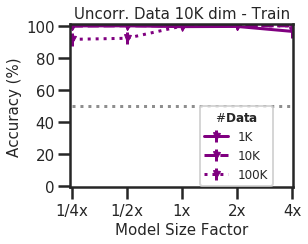

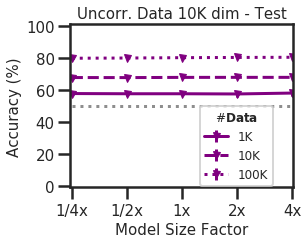

In [10]:
#Initializers - MLPs

sys.path.append('../')
import experiments


curves = 3
curve_labels = ['1K', '10K', '100K']
curve_colors = ['purple','purple','purple']
curve_styles = [ '-', '--', ':']
marker_styles = [ 'v',  'v','v']
sizes = 5
size_factors = np.array([0.25, 0.5, 1, 2, 4])
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']
select_lr = [1e-1, 1e-2, 1e-3, 1e-3]
lr = [1, 1e-1, 1e-2, 1e-3, 1e-4]
factors = [1, 2, 4, 8, 16]
seeds = 3

inits_fact = [1e-2, 1, 1e2, 1e4, 1e6]

results = np.zeros((seeds, curves, sizes))
results_test = np.zeros((seeds, curves, sizes))
# both are indexed [nn_type][size_factor]

# both are indexed [nn_type][size_factor]
for seed in range(seeds):
    for curve_idx in range(curves):
        
        optimizer_idx = 0
        
        if curve_idx == 0:
            dataset_idx = dataset_idx_map["rand10000"]
            data_idx = data_idx_map[1e3]
        elif  curve_idx == 1:
            dataset_idx = dataset_idx_map["rand10000"]
            data_idx = data_idx_map[1e4]
        elif  curve_idx == 2:
            dataset_idx = dataset_idx_map["rand10000"]
            data_idx = data_idx_map[1e5]
            
         
        for size_idx in range(sizes):
            id_best = int(IDs[1][seed, dataset_idx, data_idx, optimizer_idx, size_idx])
            

            csv_file =  experiments.opt[id_best].csv_dir + experiments.opt[id_best].name + '_redundancy.csv'
            csv_file = csv_file.replace("seed=0", "seed=" + str(seed))
            df = pd.read_csv(csv_file)
            acc = df[df['evaluation_set'] == 'train']['performance'].iloc[0]
            acc_test = df[df['evaluation_set'] == 'test']['performance'].iloc[0]
            
            results[seed][curve_idx][size_idx] = acc
            results_test[seed][curve_idx][size_idx] = acc_test

results *= 100
results_test *= 100
results_mean = np.mean(results,axis=0)
results_test_mean = np.mean(results_test,axis=0)
results_std = np.std(results,axis=0)
results_test_std = np.std(results_test,axis=0)

leg_loc = (0.58, 0.010)
print_accuracy(r'Uncorr. Data 10K dim - Train', results_mean, results_std, marker_styles, 
               curve_colors, curve_styles, curve_labels, r"#$\bf{Data}$", 50, leg_loc, True,
              "acc_synth_10k_data_train")
print_accuracy(r'Uncorr. Data 10K dim - Test', results_test_mean, results_test_std, marker_styles,
               curve_colors, curve_styles, curve_labels, r"#$\bf{Data}$", 50, leg_loc, True,
              "acc_synth_10k_data_test")


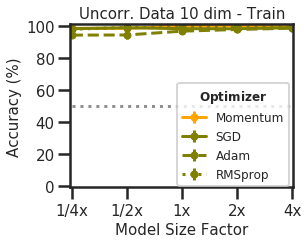

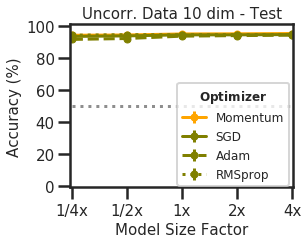

In [11]:
#Initializers - MLPs

sys.path.append('../')
import experiments


curves = 4
curve_labels = ['Momentum', 'SGD', 'Adam', 'RMSprop']
curve_colors = ['orange','olive', 'olive', 'olive']
curve_styles = ['-','-', '--',':']
marker_styles = ['o', 'o', 'o', 'o']
sizes = 5
size_factors = np.array([0.25, 0.5, 1, 2, 4])
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']
select_lr = [1e-1, 1e-2, 1e-3, 1e-3]
lr = [1, 1e-1, 1e-2, 1e-3, 1e-4]
factors = [1, 2, 4, 8, 16]
seeds = 3

inits_fact = [1e-2, 1, 1e2, 1e4, 1e6]

results = np.zeros((seeds, curves, sizes))
results_test = np.zeros((seeds, curves, sizes))
# both are indexed [nn_type][size_factor]

# both are indexed [nn_type][size_factor]
for seed in range(seeds):
    for curve_idx in range(curves):
        
        optimizer_idx = 0
        data_idx = data_idx_map[1e3]
        if curve_idx == 0:
            dataset_idx = dataset_idx_map["rand10"]
            optimizer_idx = optimizer_idx_map[0]
        elif curve_idx == 1:
            dataset_idx = dataset_idx_map["rand10"]
            optimizer_idx = optimizer_idx_map[1]
        elif  curve_idx == 2:
            dataset_idx = dataset_idx_map["rand10"]
            optimizer_idx = optimizer_idx_map[2]
        elif  curve_idx == 3:
            dataset_idx = dataset_idx_map["rand10"]
            optimizer_idx = optimizer_idx_map[5]
            

         
        for size_idx in range(sizes):
            id_best = int(IDs[1][seed, dataset_idx, data_idx, optimizer_idx, size_idx])

            csv_file =  experiments.opt[id_best].csv_dir + experiments.opt[id_best].name + '_redundancy.csv'
            csv_file = csv_file.replace("seed=0", "seed=" + str(seed))
            df = pd.read_csv(csv_file)
            acc = df[df['evaluation_set'] == 'train']['performance'].iloc[0]
            acc_test = df[df['evaluation_set'] == 'test']['performance'].iloc[0]
            results[seed][curve_idx][size_idx] = acc
            results_test[seed][curve_idx][size_idx] = acc_test

results *= 100
results_test *= 100
results_mean = np.mean(results,axis=0)
results_test_mean = np.mean(results_test,axis=0)
results_std = np.std(results,axis=0)
results_test_std = np.std(results_test,axis=0)

leg_loc = (0.48, 0.010)
print_accuracy(r'Uncorr. Data 10 dim - Train', results_mean, results_std, marker_styles, 
               curve_colors, curve_styles, curve_labels, r"$\bf{Optimizer}$", 50, leg_loc, True,
              "acc_synth_10_optimizer_train")
print_accuracy(r'Uncorr. Data 10 dim - Test', results_test_mean, results_test_std, marker_styles,
               curve_colors, curve_styles, curve_labels, r"$\bf{Optimizer}$", 50, leg_loc, True,
              "acc_synth_10_optimizer_test")


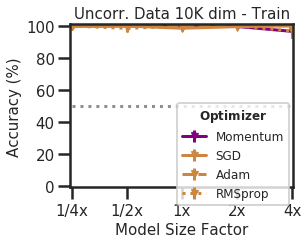

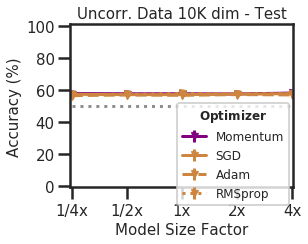

In [12]:
#Initializers - MLPs

sys.path.append('../')
import experiments


curves = 4
curve_labels = ['Momentum', 'SGD', 'Adam', 'RMSprop']
curve_colors = ['purple', 'peru','peru','peru']
curve_styles = ['-', '-', '--', ':']
marker_styles = ['v','v',  'v','v']
sizes = 5
size_factors = np.array([0.25, 0.5, 1, 2, 4])
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']
select_lr = [1e-1, 1e-2, 1e-3, 1e-3]
lr = [1, 1e-1, 1e-2, 1e-3, 1e-4]
factors = [1, 2, 4, 8, 16]
seeds = 3

inits_fact = [1e-2, 1, 1e2, 1e4, 1e6]

results = np.zeros((seeds, curves, sizes))
results_test = np.zeros((seeds, curves, sizes))
# both are indexed [nn_type][size_factor]

# both are indexed [nn_type][size_factor]
for seed in range(seeds):
    for curve_idx in range(curves):
        
        optimizer_idx = 0
        data_idx = data_idx_map[1e3]
        if curve_idx == 0:
            dataset_idx = dataset_idx_map["rand10000"]
            optimizer_idx = optimizer_idx_map[0]
        elif curve_idx == 1:
            dataset_idx = dataset_idx_map["rand10000"]
            optimizer_idx = optimizer_idx_map[1]
        elif  curve_idx == 2:
            dataset_idx = dataset_idx_map["rand10000"]
            optimizer_idx = optimizer_idx_map[2]
        elif  curve_idx == 3:
            dataset_idx = dataset_idx_map["rand10000"]
            optimizer_idx = optimizer_idx_map[5]
         
        for size_idx in range(sizes):
            id_best = int(IDs[1][seed, dataset_idx, data_idx, optimizer_idx, size_idx])

            csv_file =  experiments.opt[id_best].csv_dir + experiments.opt[id_best].name + '_redundancy.csv'
            csv_file = csv_file.replace("seed=0", "seed=" + str(seed))
            df = pd.read_csv(csv_file)
            acc = df[df['evaluation_set'] == 'train']['performance'].iloc[0]
            acc_test = df[df['evaluation_set'] == 'test']['performance'].iloc[0]
            results[seed][curve_idx][size_idx] = acc
            results_test[seed][curve_idx][size_idx] = acc_test

results *= 100
results_test *= 100
results_mean = np.mean(results,axis=0)
results_test_mean = np.mean(results_test,axis=0)
results_std = np.std(results,axis=0)
results_test_std = np.std(results_test,axis=0)

leg_loc = (0.48, -0.110)
print_accuracy(r'Uncorr. Data 10K dim - Train', results_mean, results_std, marker_styles, 
               curve_colors, curve_styles, curve_labels, r"$\bf{Optimizer}$", 50, leg_loc, True,
              "acc_synth_10k_optimizer_train")
print_accuracy(r'Uncorr. Data 10K dim - Test', results_test_mean, results_test_std, marker_styles,
               curve_colors, curve_styles, curve_labels, r"$\bf{Optimizer}$", 50, leg_loc, True,
              "acc_synth_10k_optimizer_test")


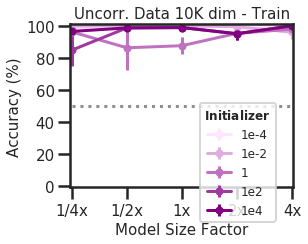

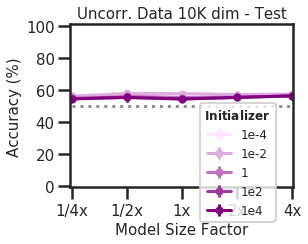

In [13]:
#Initializers - MLPs

sys.path.append('../')
import experiments


curves = 5
curve_labels = ['1e-4', '1e-2', '1', '1e2', '1e4']
cm = seaborn.light_palette("purple", as_cmap=True)
curve_colors = [cm(i) for i in np.linspace(0.0, 1.0, num=5)]
curve_styles = ['-', '-', '-', '-', '-']
marker_styles = ['o', 'o', 'o', 'o',  'o']
sizes = 5
size_factors = np.array([0.25, 0.5, 1, 2, 4])
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']
select_lr = [1e-1, 1e-2, 1e-3, 1e-3]
lr = [1, 1e-1, 1e-2, 1e-3, 1e-4]
factors = [1, 2, 4, 8, 16]
seeds = 2

inits_fact = [1e-2, 1, 1e2, 1e4, 1e6]

results = np.zeros((seeds, curves, sizes))
results_test = np.zeros((seeds, curves, sizes))
# both are indexed [nn_type][size_factor]

# both are indexed [nn_type][size_factor]
for seed in range(seeds):
    for curve_idx in range(curves):
        
        optimizer_idx = 0
        dataset_idx = dataset_idx_map["rand10000"]
        data_idx = data_idx_map[1e3]
        init_idx = init_idx_map[inits_fact[curve_idx]]
         
        for size_idx in range(sizes):
            id_best = int(IDs[0][seed, dataset_idx, data_idx, optimizer_idx, init_idx, size_idx])
            
            csv_file =  experiments.opt[id_best].csv_dir + experiments.opt[id_best].name + '_redundancy.csv'
            csv_file = csv_file.replace("seed=0", "seed=" + str(seed))
            df = pd.read_csv(csv_file)
            acc = df[df['evaluation_set'] == 'train']['performance'].iloc[0]
            acc_test = df[df['evaluation_set'] == 'test']['performance'].iloc[0]
            results[seed][curve_idx][size_idx] = acc
            results_test[seed][curve_idx][size_idx] = acc_test

results *= 100
results_test *= 100
results_mean = np.mean(results,axis=0)
results_test_mean = np.mean(results_test,axis=0)
results_std = np.std(results,axis=0)
results_test_std = np.std(results_test,axis=0)

leg_loc = (0.58, -0.210)
print_accuracy(r'Uncorr. Data 10K dim - Train', results_mean, results_std, marker_styles, 
               curve_colors, curve_styles, curve_labels, r"$\bf{Initializer}$", 50, leg_loc, True,
              "acc_synth_10k_initializer_train")
print_accuracy(r'Uncorr. Data 10K dim - Test', results_test_mean, results_test_std, marker_styles,
               curve_colors, curve_styles, curve_labels, r"$\bf{Initializer}$", 50, leg_loc, True,
              "acc_synth_10k_initializer_test")


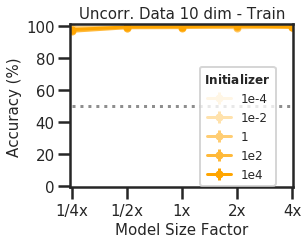

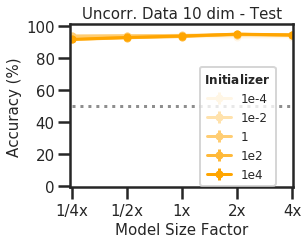

In [14]:
#Initializers - MLPs

sys.path.append('../')
import experiments


curves = 5
curve_labels = ['1e-4', '1e-2', '1', '1e2', '1e4']
cm = seaborn.light_palette("orange", as_cmap=True)

curve_colors = [cm(i) for i in np.linspace(0.0, 1.0, num=5)]
curve_styles = ['-', '-', '-', '-', '-']
marker_styles = ['o', 'o', 'o', 'o',  'o']
sizes = 5
size_factors = np.array([0.25, 0.5, 1, 2, 4])
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']
select_lr = [1e-1, 1e-2, 1e-3, 1e-3]
lr = [1, 1e-1, 1e-2, 1e-3, 1e-4]
factors = [1, 2, 4, 8, 16]
seeds = 3

inits_fact = [1e-2, 1, 1e2, 1e4, 1e6]

results = np.zeros((seeds, curves, sizes))
results_test = np.zeros((seeds, curves, sizes))
# both are indexed [nn_type][size_factor]

# both are indexed [nn_type][size_factor]
for seed in range(seeds):
    for curve_idx in range(curves):
        
        optimizer_idx = 0
        dataset_idx = dataset_idx_map["rand10"]
        data_idx = data_idx_map[1e3]
        init_idx = init_idx_map[inits_fact[curve_idx]]
         
        for size_idx in range(sizes):
            id_best = int(IDs[0][seed, dataset_idx, data_idx, optimizer_idx, init_idx, size_idx])

            csv_file =  experiments.opt[id_best].csv_dir + experiments.opt[id_best].name + '_redundancy.csv'
            csv_file = csv_file.replace("seed=0", "seed=" + str(seed))
            df = pd.read_csv(csv_file)
            acc = df[df['evaluation_set'] == 'train']['performance'].iloc[0]
            acc_test = df[df['evaluation_set'] == 'test']['performance'].iloc[0]
            results[seed][curve_idx][size_idx] = acc
            results_test[seed][curve_idx][size_idx] = acc_test

results *= 100
results_test *= 100
results_mean = np.mean(results,axis=0)
results_test_mean = np.mean(results_test,axis=0)
results_std = np.std(results,axis=0)
results_test_std = np.std(results_test,axis=0)

leg_loc = (0.58, 0.010)
print_accuracy(r'Uncorr. Data 10 dim - Train', results_mean, results_std, marker_styles, 
               curve_colors, curve_styles, curve_labels, r"$\bf{Initializer}$", 50, leg_loc, True,
              "acc_synth_10_initializer_train")
print_accuracy(r'Uncorr. Data 10 dim - Test', results_test_mean, results_test_std, marker_styles,
               curve_colors, curve_styles, curve_labels, r"$\bf{Initializer}$", 50, leg_loc, True,
              "acc_synth_10_initializer_test")


OPTS LOOKUP:
ID: 0, resnet, factor: 0.25, batch_size:8192
ID: 1, resnet, factor: 0.5, batch_size:4096
ID: 2, resnet, factor: 1, batch_size:3072
ID: 3, resnet, factor: 2, batch_size:1024
ID: 4, resnet, factor: 4, batch_size:512
ID: 5, resnet, factor: 0.25, batch_size:4096
ID: 6, resnet, factor: 0.25, batch_size:2048
ID: 7, resnet, factor: 0.5, batch_size:2048
ID: 8, resnet, factor: 1, batch_size:2048
ID: 9, resnet, factor: 0.25, batch_size:1024
ID: 10, resnet, factor: 0.5, batch_size:1024
ID: 11, resnet, factor: 1, batch_size:1024
ID: 12, inception, factor: 1, batch_size:512
ID: 13, inception, factor: 0.25, batch_size:512
ID: 14, inception, factor: 0.5, batch_size:512
ID: 15, inception, factor: 1, batch_size:512
ID: 16, inception, factor: 1, batch_size:512
ID: 17, inception, factor: 1, batch_size:512
ID: 18, inception, factor: 1, batch_size:512
ID: 19, resnet, factor: 0.25, batch_size:8192
ID: 20, resnet, factor: 0.5, batch_size:4096
ID: 21, resnet, factor: 1, batch_size:3072
ID: 22, re

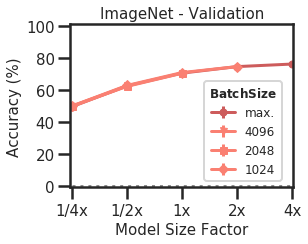

In [15]:
#Batch - ImageNet

sys.path.append('../')
sys.path.append('../ImageNet/')
from ImageNet.experiments import experiments

opts = experiments.get_experiments('','')

curves = 4
curve_labels = ['max.',  '4096', '2048', '1024']
curve_colors = ['indianred', 'salmon', 'salmon', 'salmon']
curve_styles = ['-', '-', '-', '-']
marker_styles = ['o', 'v', 's', 'D']
sizes = 5
size_factors = np.array([0.25, 0.5, 1, 2, 4])
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']

results = np.zeros((curves, sizes))

# both are indexed [nn_type][size_factor]

for ID in range(5):

    #print('Processing ID:', ID)
    opt = opts[ID]

    curve_idx = 0  # unregularized

    size_idx = size_idx_map[opt.dnn.factor]

    csv_file = opt.csv_dir + opt.name + '_redundancy.csv'
    df = pd.read_csv(csv_file)
    acc = df[df['evaluation_set'] == 'validation']['top_1_acc'].iloc[0]
    results[curve_idx][size_idx] = acc*100

batch_plot = [4096, 2048, 1024]
for ID in range(13):

    #print('Processing ID:', ID)
    opt = opts[ID]

    size_idx = size_idx_map[opt.dnn.factor]
    batch_idx = np.where(np.asarray(batch_plot) == opt.hyper.batch_size)[0]
    if len(batch_idx):
        csv_file = opt.csv_dir + opt.name + '_redundancy.csv'
        df = pd.read_csv(csv_file)
        acc = df[df['evaluation_set'] == 'validation']['top_1_acc'].iloc[0]
        results[int(batch_idx)+1][size_idx] = acc*100  
        
leg_loc = (0.6, 0.040)

print_accuracy(r'ImageNet - Validation', results,0*results, marker_styles, 
               curve_colors, curve_styles, curve_labels, r"$\bf{Batch} \bf{Size}$", 0.1, leg_loc, True,
              "acc_imagenet_batch_test")


OPTS LOOKUP:
ID: 0, resnet, factor: 0.25, batch_size:8192
ID: 1, resnet, factor: 0.5, batch_size:4096
ID: 2, resnet, factor: 1, batch_size:3072
ID: 3, resnet, factor: 2, batch_size:1024
ID: 4, resnet, factor: 4, batch_size:512
ID: 5, resnet, factor: 0.25, batch_size:4096
ID: 6, resnet, factor: 0.25, batch_size:2048
ID: 7, resnet, factor: 0.5, batch_size:2048
ID: 8, resnet, factor: 1, batch_size:2048
ID: 9, resnet, factor: 0.25, batch_size:1024
ID: 10, resnet, factor: 0.5, batch_size:1024
ID: 11, resnet, factor: 1, batch_size:1024
ID: 12, inception, factor: 1, batch_size:512
ID: 13, inception, factor: 0.25, batch_size:512
ID: 14, inception, factor: 0.5, batch_size:512
ID: 15, inception, factor: 1, batch_size:512
ID: 16, inception, factor: 1, batch_size:512
ID: 17, inception, factor: 1, batch_size:512
ID: 18, inception, factor: 1, batch_size:512
ID: 19, resnet, factor: 0.25, batch_size:8192
ID: 20, resnet, factor: 0.5, batch_size:4096
ID: 21, resnet, factor: 1, batch_size:3072
ID: 22, re

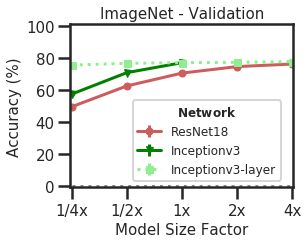

In [16]:
#ImageNet

sys.path.append('../')
sys.path.append('../ImageNet/')
from ImageNet.experiments import experiments

opts = experiments.get_experiments('','')

curves = 3
curve_labels = ['ResNet18',  'Inceptionv3', 'Inceptionv3-layer']
curve_colors = ['indianred', 'green', 'lightgreen']
curve_styles = ['-', '-', ':']
marker_styles = ['o', 'v', 's']

sizes = 5
size_factors = np.array([0.25, 0.5, 1, 2, 4])
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['1/4x', '1/2x', '1x', '2x', '4x']

results = np.zeros((curves, sizes))

# both are indexed [nn_type][size_factor]

for ID in range(5):

    #print('Processing ID:', ID)
    opt = opts[ID]

    curve_idx = 0  # unregularized

    size_idx = size_idx_map[opt.dnn.factor]

    csv_file = opt.csv_dir + opt.name + '_redundancy.csv'
    df = pd.read_csv(csv_file)
    acc = df[df['evaluation_set'] == 'validation']['top_1_acc'].iloc[0]
    results[curve_idx][size_idx] = acc*100

for ID in range(12,15):

    #print('Processing ID:', ID)
    opt = opts[ID]

    size_idx = size_idx_map[opt.dnn.factor]
    csv_file = opt.csv_dir + opt.name + '_redundancy.csv'
    df = pd.read_csv(csv_file)
    acc = df[df['evaluation_set'] == 'validation']['top_1_acc'].iloc[0]
    results[1][size_idx] = acc*100  
    
for ID in list(range(12,13)) + list(range(15,19)):

    #print('Processing ID:', ID)
    opt = opts[ID]

    size_idx = size_idx_map[opt.dnn.factor_end]
    print(size_idx)
    csv_file = opt.csv_dir + opt.name + '_redundancy.csv'
    print(csv_file)
    df = pd.read_csv(csv_file)
    acc = df[df['evaluation_set'] == 'validation']['top_1_acc'].iloc[0]
    results[2][size_idx] = acc*100  
        
leg_loc = (0.28, 0.040)

print_accuracy(r'ImageNet - Validation', results,0*results, marker_styles, 
               curve_colors, curve_styles, curve_labels, r"$\bf{Network}$", 0.1, leg_loc, True,
              "acc_imagenet_test")


OPTS LOOKUP:
ID: 0, resnet, factor: 0.25, batch_size:8192
ID: 1, resnet, factor: 0.5, batch_size:4096
ID: 2, resnet, factor: 1, batch_size:3072
ID: 3, resnet, factor: 2, batch_size:1024
ID: 4, resnet, factor: 4, batch_size:512
ID: 5, resnet, factor: 0.25, batch_size:4096
ID: 6, resnet, factor: 0.25, batch_size:2048
ID: 7, resnet, factor: 0.5, batch_size:2048
ID: 8, resnet, factor: 1, batch_size:2048
ID: 9, resnet, factor: 0.25, batch_size:1024
ID: 10, resnet, factor: 0.5, batch_size:1024
ID: 11, resnet, factor: 1, batch_size:1024
ID: 12, inception, factor: 1, batch_size:512
ID: 13, inception, factor: 0.25, batch_size:512
ID: 14, inception, factor: 0.5, batch_size:512
ID: 15, inception, factor: 1, batch_size:512
ID: 16, inception, factor: 1, batch_size:512
ID: 17, inception, factor: 1, batch_size:512
ID: 18, inception, factor: 1, batch_size:512
ID: 19, resnet, factor: 0.25, batch_size:8192
ID: 20, resnet, factor: 0.5, batch_size:4096
ID: 21, resnet, factor: 1, batch_size:3072
ID: 22, re

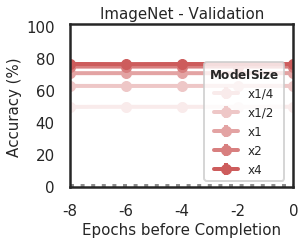

In [17]:
#Time - ImageNet

sys.path.append('../')
sys.path.append('../ImageNet/')
from ImageNet.experiments import experiments

opts = experiments.get_experiments('','')

curves = 5
curve_labels = ['x1/4',  'x1/2', 'x1', 'x2', 'x4']
cm = seaborn.light_palette("indianred", as_cmap=True)
curve_colors = [cm(i) for i in np.linspace(0.0, 1.0, num=5)]
curve_styles = ['-', '-', '-', '-', '-']
marker_styles = ['o', 'o', 'o', 'o', 'o']
sizes = 5
size_factors = np.array([-4, -3, -2, -1, 0])
size_idx_map = {0.25: 0, 0.5: 1, 1: 2, 2: 3, 4: 4}
size_labels = ['-8', '-6', '-4', '-2', '0']

results = np.zeros((curves, sizes))

# both are indexed [nn_type][size_factor]

for ID in range(19, 38):

    #print('Processing ID:', ID)
    opt = opts[ID]

    curve_idx = 0  # unregularized

    size_idx = size_idx_map[opt.dnn.factor]

    csv_file = opt.csv_dir + opt.name + '_redundancy.csv'
    df = pd.read_csv(csv_file)
    acc = df[df['evaluation_set'] == 'validation']['top_1_acc'].iloc[0]
    results[size_idx][opt.time_step] = acc*100

    
for ID in range(5):

    #print('Processing ID:', ID)
    opt = opts[ID]

    curve_idx = 0  # unregularized

    size_idx = size_idx_map[opt.dnn.factor]
    
    csv_file = opt.csv_dir + opt.name + '_redundancy.csv'
    df = pd.read_csv(csv_file)
    acc = df[df['evaluation_set'] == 'validation']['top_1_acc'].iloc[0]
    results[size_idx][-1] = acc*100
    
data = results
stds = 0*results
title = r'ImageNet - Validation'
leg_title = r"$\bf{Model} \bf{Size}$"
leg_flag = True
rand_base = 0.1


fig, ax = plt.subplots(figsize=(4, 3))
plt.title(title , fontsize=25)
plt.xlabel(r'Epochs before Completion', fontsize=25)
plt.ylabel(r'Accuracy (%)', fontsize=25)
plt.xlim((-4, 0))
plt.ylim((-1, 101))
#plt.grid(True, which='both')
plt.xticks(size_factors, size_labels)
plt.yticks([0, 20, 40, 60, 80, 100])

for curve_idx in range(np.shape(data)[0]):
    non_0_idx = (data[curve_idx] != 0)
    plt.errorbar(size_factors[non_0_idx], data[curve_idx][non_0_idx], yerr=stds[curve_idx][non_0_idx], marker=marker_styles[curve_idx], color=curve_colors[curve_idx],
             linestyle=curve_styles[curve_idx], linewidth=4, markersize=10)
plt.errorbar(size_factors, [rand_base for i in range(len(size_factors))], color='dimgrey', linestyle=':', linewidth=4, alpha=0.75)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
leg_loc = (0.6, 0.040)

if leg_flag:
    leg = plt.legend(curve_labels, loc=leg_loc, framealpha=0.8, fontsize=12, title=leg_title)
    leg.get_title().set_fontsize('12')
plt.rc('xtick',labelsize=8)

plt.show()
fig.savefig("acc_imagenet_dynamics_test.pdf",format='pdf', bbox_inches='tight',dpi=1000)
    

In [18]:
data

array([[49.30513822, 49.34457632, 49.3370643 , 49.30513822, 49.38401442],
       [62.40625   , 62.38476563, 62.39453125, 62.42773438, 62.39648438],
       [70.38154987, 70.40719697, 70.38944129, 70.37760417, 70.41508838],
       [74.4917889 , 74.48580995, 74.52168367, 74.51570472, 74.48580995],
       [76.12802934, 76.06226084, 76.11407844,  0.        , 76.08816964]])